In [1]:
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
import shap
import pickle
import cloudpickle
import numpy as np
from comparers import ModelComparer
%matplotlib inline
task_name = '08'

# Setup Task

In this demo, we will investigate the differences between a quadratic model and a gaussion naive bayes model on a linearly separable classification task.

In [3]:
X, y = make_classification(n_samples=600, n_features=2, n_redundant=0, n_informative=2,
                           n_clusters_per_class=1, class_sep=0.75, random_state=0)
X *= 100
feature_names = np.array(['x1', 'x2'])
with open(task_name + '.dataset', 'wb') as f:
    pickle.dump((X, y, feature_names), f, pickle.HIGHEST_PROTOCOL)

In [4]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf_a = QuadraticDiscriminantAnalysis(store_covariance=True)
clf_a.fit(X, y)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [5]:
from sklearn.naive_bayes import GaussianNB
clf_b = GaussianNB()
clf_b.fit(X, y)

GaussianNB()

In [6]:
comparer = ModelComparer(clf_a, clf_b, feature_names)
comparer.fit(X, y)
with open(task_name + '.models', 'wb') as f:
    cloudpickle.dump(comparer, f, pickle.HIGHEST_PROTOCOL)

## Individual Classifiers' Decision Boundaries

Both models have a similar shape of their decision boundaries, yet they are classifiers of different types and make different errors on the target task. Below we plot the instances of the test set plus the contours of the decision boundaries, evaluated for a fine, equally spaced grid of generated instances in the same feature ranges, just for demo purposes. It acts as a sort of visual ground truth for checking the simple toy explanations.

### Hard Decision Boundaries

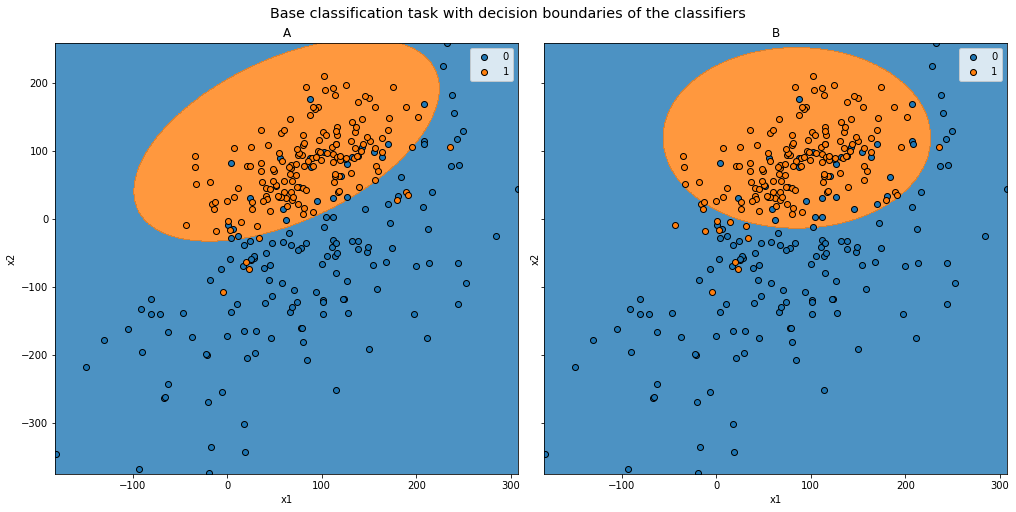

In [7]:
comparer.plot_individual_clf_decision_boundaries(X, y_true=y, kind='label')

### Soft Decision Boundaries (Probabilities)

In this case the base classifiers support probability estimates. They offer a more detailed view of the decision boundary.

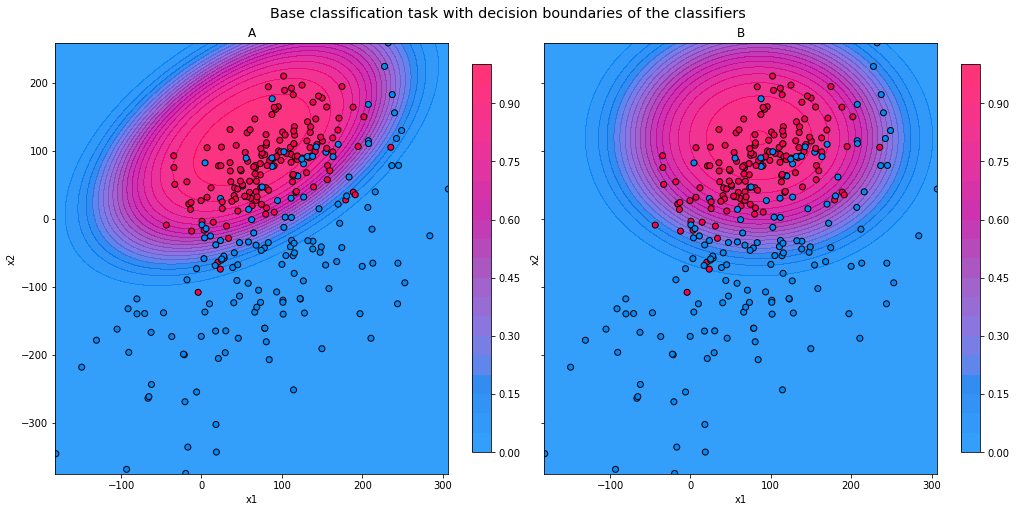

In [8]:
comparer.plot_individual_clf_decision_boundaries(X, y_true=y, kind='proba')

### Soft Decision Boundaries (Log Odds)

If the classifiers support log probability estimates, they can easily be transformed to log odds which are often better suited for SHAP value explanations because of their additive nature.

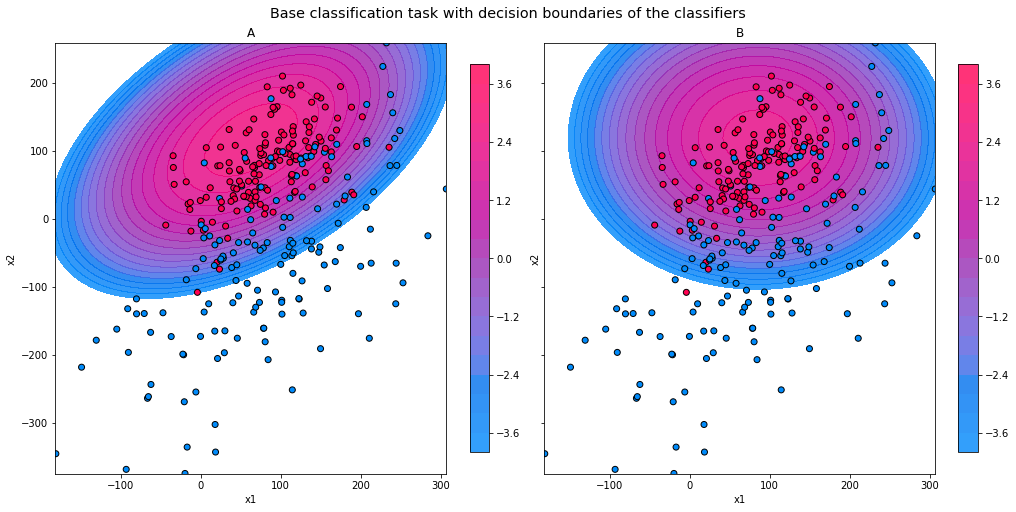

In [9]:
comparer.plot_individual_clf_decision_boundaries(X, y_true=y, kind='log-odds')

White areas are outside the visualized colour scale. Please note, that +/-4 log odds corresponds to a probability of roughly 0.98

## Binary and Multiclass Difference Classifiers' Decision Boundaries

In the following plots the decision boundaries of the binary and multiclass difference classifiers are shown.

### Hard Decision Boundaries

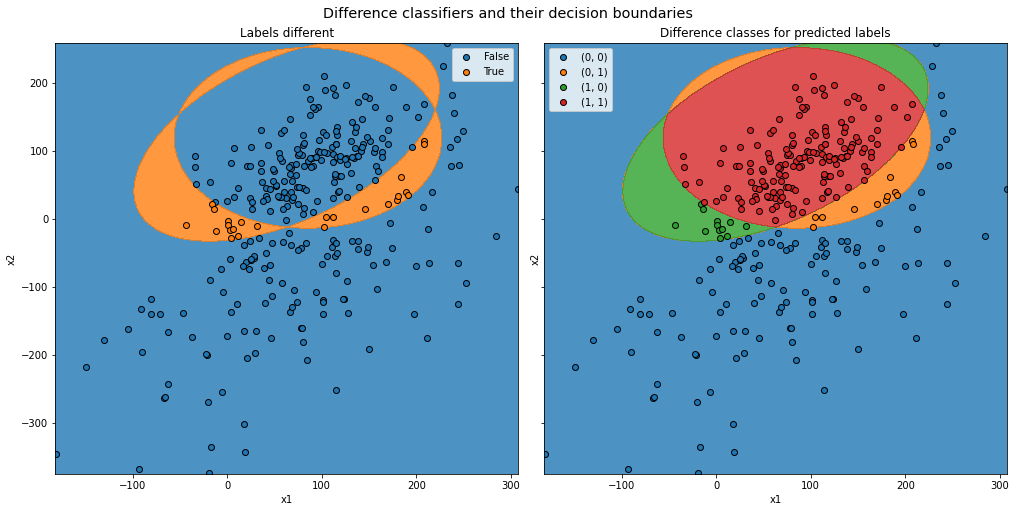

In [10]:
comparer.plot_decision_boundaries(X)

### Soft Decision Boundaries (Probabilities)

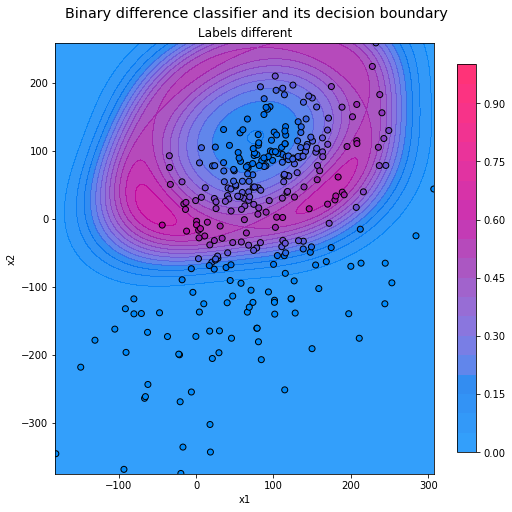

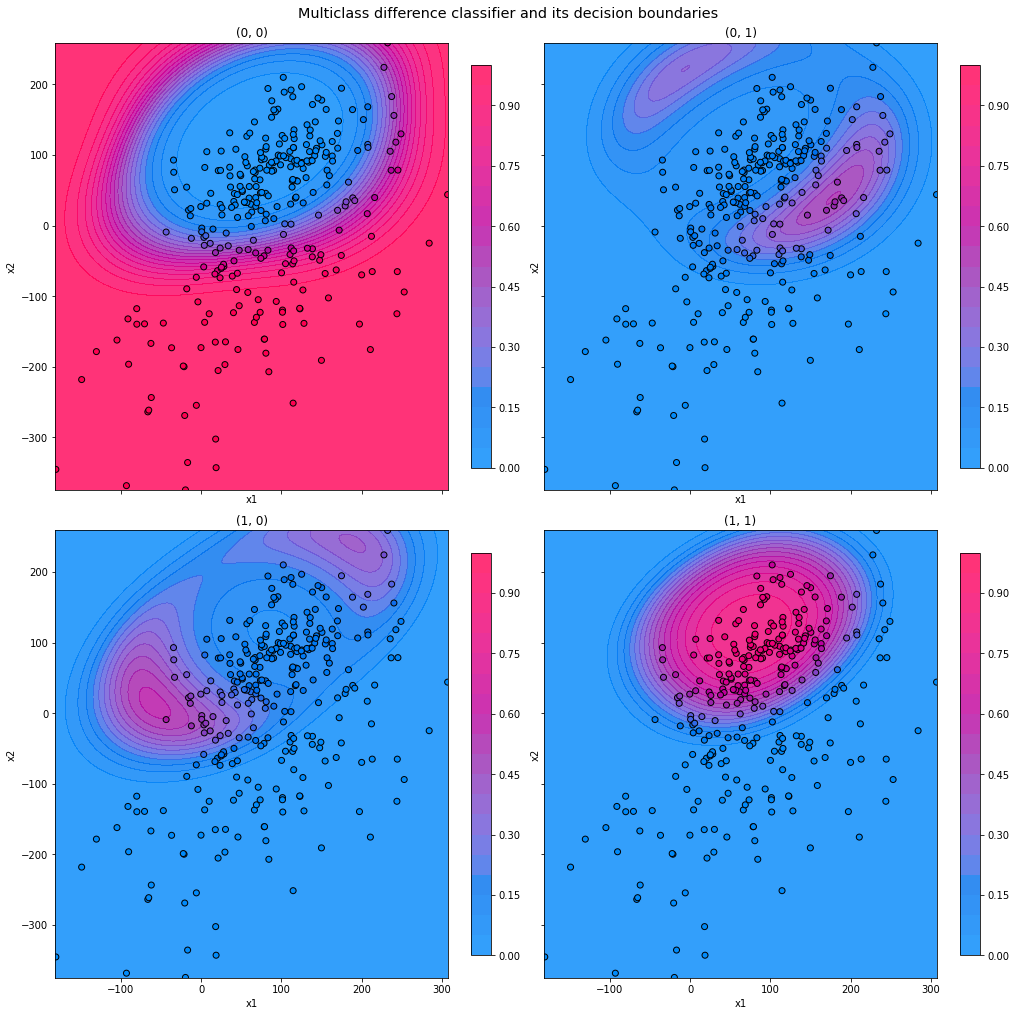

In [11]:
comparer.plot_decision_boundaries(X, kind='proba')

### Soft Decision Boundaries (Log Odds)

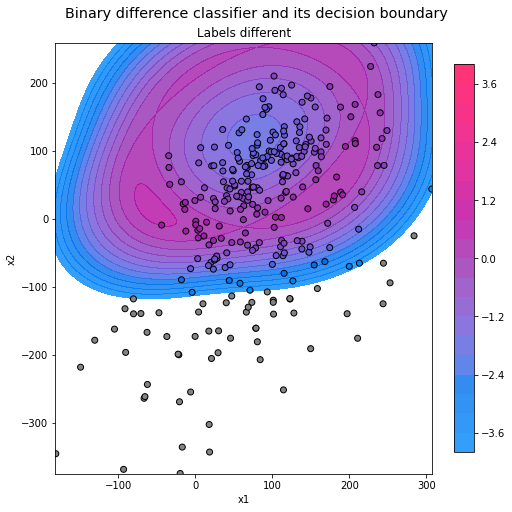

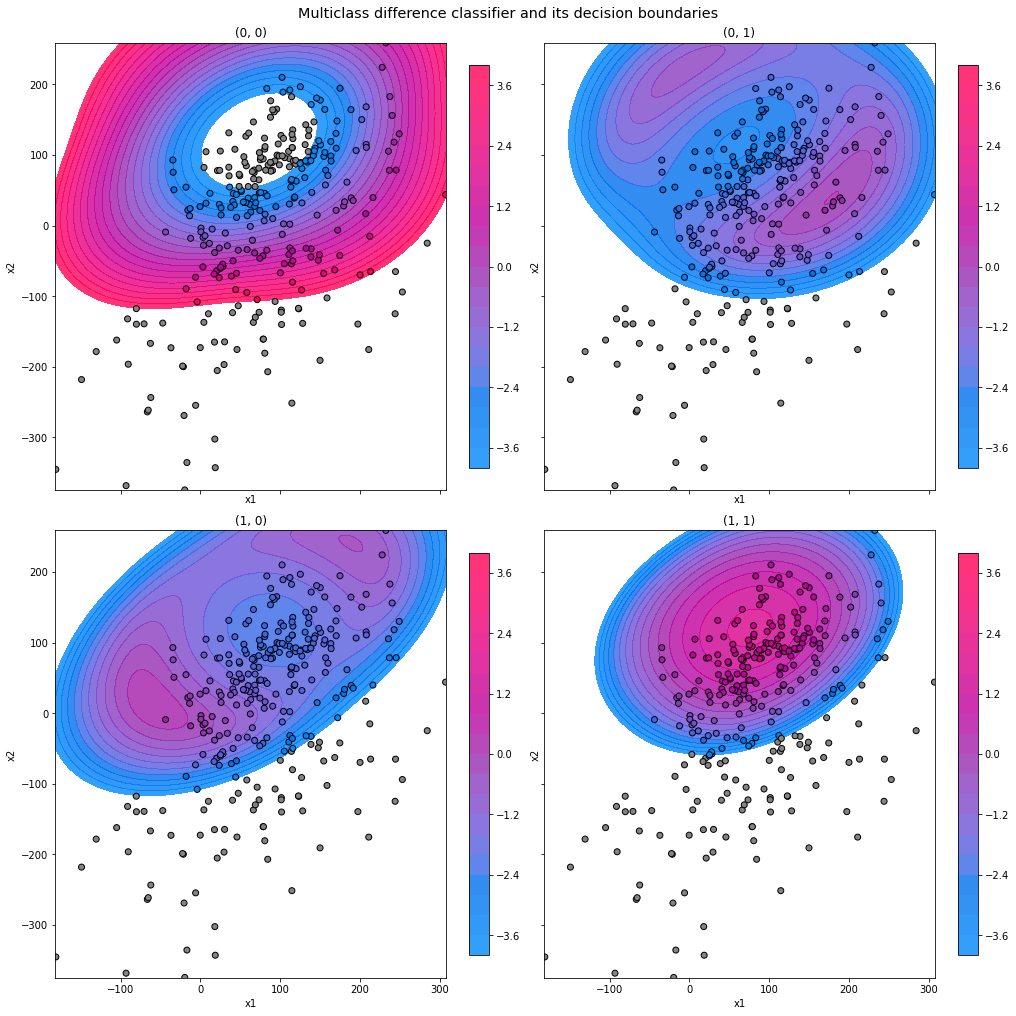

In [12]:
comparer.plot_decision_boundaries(X, kind='log-odds')

## Difference Class Confusion Matrix

In this adapted version of a confusion matrix the number of instances per difference class is shown.

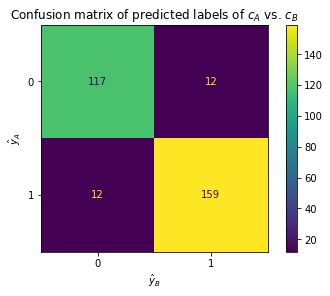

In [13]:
comparer.plot_confusion_matrix(X)